In [126]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.colors as mcolors
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
sns.set_style("darkgrid")

In [146]:
data = np.random.normal(size=(1_000,4))

In [147]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
sns.set_style("darkgrid")
# transparent_cmap = LinearSegmentedColormap.from_list(
#     "transparent_blue", 
#     [(0, (0, 0, 1, 0)), (1, (0, 0, 0, 1))]  # RGBA: transparent blue to opaque dark blue
# )
# rgb = sns.light_palette("#CD5656", as_cmap=False, n_colors=2)
# rgb = np.array(rgb)
# convert an html color #CD5656 to an RGB tuple using seaborn
rgb_base = np.array(mcolors.to_rgb("#CD5656"))

colors = [(rgb_base[0], rgb_base[1], rgb_base[2], 0), # At data value 0, color is rgb_base with alpha 0
          (rgb_base[0], rgb_base[1], rgb_base[2], 1)] # At data value 1, color is rgb_base with alpha 1

transparent_cmap= LinearSegmentedColormap.from_list("transparent_red", colors, N=256)
# print("Method 2 (LinearSegmentedColormap) created.")

# # # get the viridis colormap
# # rgb = sns.color_palette("magma", n_colors=256)

# # Create an alpha gradient from 0 (transparent) to 1 (opaque)
# alpha = np.linspace(0, 1, 256)

# # Combine RGB and alpha to make RGBA
# rgba = np.concatenate([np.repeat(rgb[None,:],256,axis=0), alpha[:, None]], axis=1)

# # Create a new colormap
# transparent_cmap = ListedColormap(rgba)

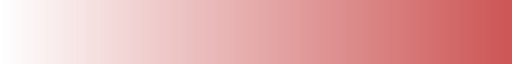

In [148]:
transparent_cmap

In [149]:
dataframe = pd.DataFrame(data, columns=[r"$A_1$", r"$B_2$", r"$C_3$", r"$D_4$"])

In [150]:
# # plot a jointplot with hex and histograms
# # g = sns.jointplot(data=data, x="x_0", y="x_1", kind="kde", fill=True)
# g = sns.jointplot(dataframe, x="A", y="B", kind="hex", height=6, gridsize=25, marginal_kws=dict(bins=25, fill=True, color="#202A44"),joint_kws=dict(cmap=transparent_cmap))
# # add custom labels for x0 and x1 with latex
# g.ax_joint.set_xlabel(r"$\theta_0$", fontsize=14)
# g.ax_joint.set_ylabel(r"$\theta_1$", fontsize=14)
# g.plot_joint(sns.kdeplot, color="#202A44", zorder=3, levels=[0.68, 0.956, 0.997], alpha=1, linewidths=1)
# # g.plot_marginals(sns.rugplot, color="r", height=-.15, clip_on=True)
# # plt.savefig("/lhome/ific/a/aamerio/github/GenSBI/examples/sbi-benchmarks/two_moons/two_moons_posterior.png", dpi=300, bbox_inches='tight')
# plt.show()

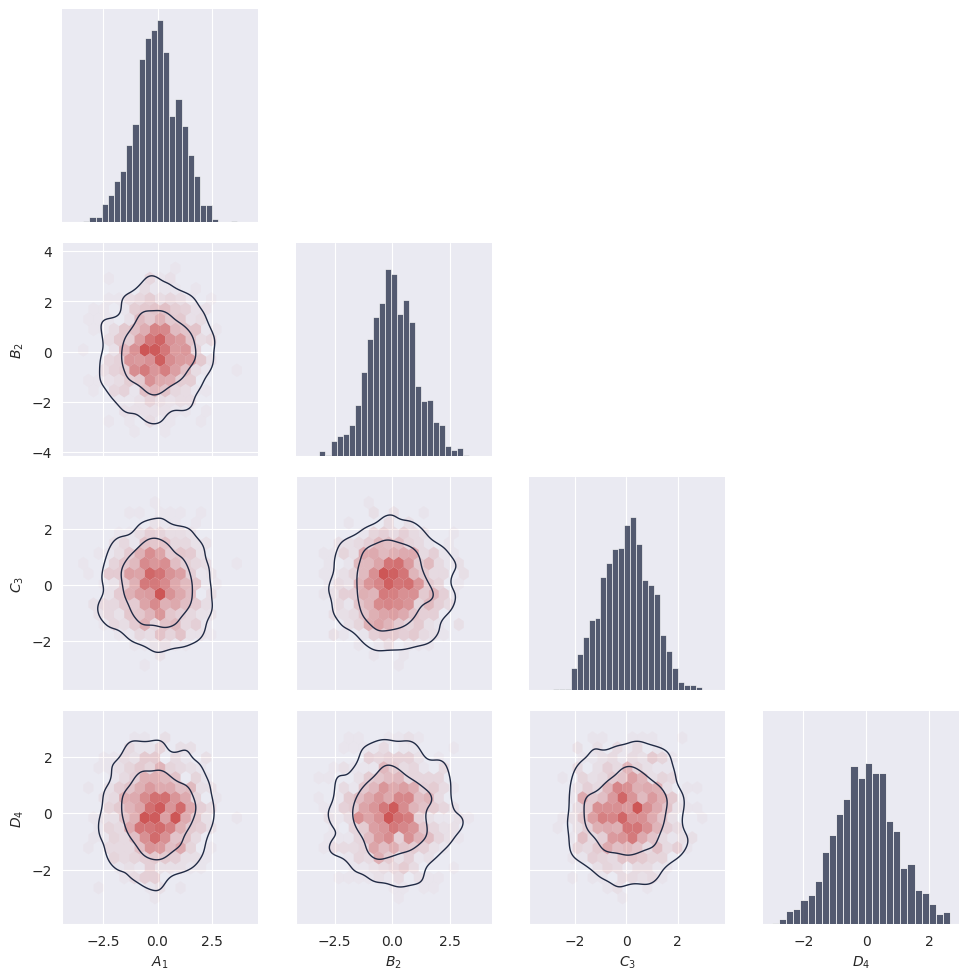

In [153]:
g = sns.PairGrid(dataframe, corner=True)
g.map_lower(plt.hexbin, gridsize=15, cmap=transparent_cmap, color=colors[0])
g.map_lower(sns.kdeplot, levels=np.sort(1-np.array([0.68, 0.95])), color="#202A44", zorder=3, alpha=1, linewidths=1)
g.map_diag(sns.histplot, bins=25, color="#202A44", fill=True)
# g.map_offdiag(sns.scatterplot)